Zunächst werden die Datenquellen geladen und einige Metainformationen zur schnellen Orientierung ausgegeben.

In [156]:
import pandas as pd


# Datenquelle wird eingelesen
patient_info = pd.read_csv('Patient Info.csv')
hospital_visit = pd.read_csv('date.csv')

# Info und Describe für patient_info
print("Patient Info - Info:")
patient_info.info()

print("\nPatient Info - Describe:")
print(patient_info.describe())

# Info und Describe für hospital_visit
print("\nHospital Visit - Info:")
hospital_visit.info()

print("\nHospital Visit - Describe:")
print(hospital_visit.describe())


print("Patient Info - Head:")
print(patient_info.head())

# Displaying the first few rows of hospital_visit
print("\nHospital Visit - Head:")
print(hospital_visit.head())

Patient Info - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Participant_ID  2216 non-null   int64  
 1   Sex             2216 non-null   object 
 2   Age             2216 non-null   int64  
 3   Smoking_status  2213 non-null   object 
 4   BMI             2197 non-null   float64
 5   Disease         2216 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 104.0+ KB

Patient Info - Describe:
       Participant_ID          Age          BMI      Disease
count    2.216000e+03  2216.000000  2197.000000  2216.000000
mean     3.557200e+06    61.467058    29.083380     1.744585
std      1.426696e+06     6.689083     5.578879     0.436193
min      1.003300e+06     6.000000   -31.413300     1.000000
25%      2.338796e+06    58.000000    25.507800     1.000000
50%      3.591072e+06    63.000000    28.183200     2.000

Der Datensatz patien_info enthält 6 Spalten von denen Participant_ID als Unique Identifier dient. Dieser scheint mit dem Datensatz hospital_info verknüpfbar zu sein.

Es existieren negative Werte für BMI in patient_info. Dies sind womöglich fehlerhafte Daten, die ich im späteren Verlauf bereinigen werde.

Laut Aufgabenstellung ist 1: Disease und 2: Healthy zu interpretieren.

Aufgabe 1: Replace missing BMI values with the median BMI for the corresponding gender.

In [157]:
# Mit dieser Zeile identifieziere ich Einträge mit fehlenden BMI-Werten
missing_bmi = patient_info['BMI'].isna()

# Hier rechne ich vorab die Medianwerte für Männer und Frauen aus
median_bmi = patient_info.groupby('Sex')['BMI'].median()

# Hier fülle ich die fehlenden BMI-Werte mit den Medianwerten auf, falls sie fehlen
patient_info['BMI'] = patient_info.apply(lambda row: median_bmi[row['Sex']] if pd.isna(row['BMI']) else row['BMI'], axis=1)

# Hier wird überprüft, ob noch fehlende BMI-Werte vorhanden sind
assert  patient_info['BMI'].isna().sum() == 0


Aufgabe 2: Perform a sanity check on all columns in both files, and remove any samples that do not pass.

In [158]:

# Hier wird sichergestellt, dass nur über 40-jährige Patienten berücksichtigt werden und das Alter als numerischer Wert vorliegt.
patient_info['Age'] = pd.to_numeric(patient_info['Age'], errors='coerce')
patient_info = patient_info[patient_info['Age'] >= 40]

# Hier wird sichergestellt, dass nur Patient mit gültiger und vorhandener ID berücksichtigt werden und dass die ID aus 7 Ziffern besteht.
patient_info['Participant_ID'] = pd.to_numeric(patient_info['Participant_ID'], errors='coerce')
patient_info = patient_info[patient_info['Participant_ID'].notna() & (patient_info['Participant_ID'].astype(str).str.len() == 7)]

# Hier wird sichergestellt, dass nur Patient berücktsichtigt werden, die einen BMI zwischen 15 und 60 haben und dass der BMI als numerischer Wert vorliegt.
patient_info['BMI'] = pd.to_numeric(patient_info['BMI'], errors='coerce')
patient_info = patient_info[patient_info['BMI'].between(15, 60)]

# Hier wird sichergestellt, dass nur Patienten mit gültigem Geschlecht berücksichtigt werden und dass das Geschlecht als String vorliegt.
patient_info = patient_info[patient_info['Sex'].astype(str).isin(['Male', 'Female'])]

# Hier wird sichergestellt, dass nur Patienten mit gültigem Rauchverhalten berücksichtigt werden und dass das Rauchverhalten als String vorliegt.
patient_info = patient_info[patient_info['Smoking_status'].astype(str).isin(['Never', 'Previous', 'Current', 'Prefer not to answer'])]

# Hier wird sichergestellt, dass nur Patienten mit gültiger Krankheit berücksichtigt werden und dass die Krankheit als numerischer Wert vorliegt.
patient_info['Disease'] = pd.to_numeric(patient_info['Disease'], errors='coerce')
patient_info = patient_info[patient_info['Disease'].between(1, 2)]

# Hier wird auch sicher gestellt, dass nur Patienten mit gültiger ID berücksichtigt werden und dass die ID als numerischer Wert vorliegt.
hospital_visit['Participant_ID'] = pd.to_numeric(hospital_visit['Participant_ID'], errors='coerce')
hospital_visit = hospital_visit[hospital_visit['Participant_ID'].notna() & (hospital_visit['Participant_ID'].astype(str).str.len() == 7)]

# Hier wird sichergestellt, dass das Besucherdatum als korrektes Datum vorliegt.
hospital_visit['VisitDate'] = pd.to_datetime(hospital_visit['VisitDate'], errors='coerce', dayfirst=True)
hospital_visit = hospital_visit[hospital_visit['VisitDate'].notna()]

# Hier werden die Daten bereinigt, indem Zeilen mit fehlenden Werten entfernt werden. Dies kann sein, da mit errors='coerce' gearbeitet wurde und somit fehlerhafte Werte als NaN gesetzt wurden.
patient_info.dropna(subset=['Participant_ID', 'Sex', 'Age', 'Smoking_status', 'BMI', 'Disease'], inplace=True)
hospital_visit.dropna(subset=['Participant_ID', 'VisitDate'], inplace=True)

print(patient_info)
print(hospital_visit)


      Participant_ID     Sex  Age Smoking_status      BMI  Disease
0            1003300    Male   62       Previous  33.7597        2
1            1004025    Male   60       Previous  28.1173        1
2            1005551    Male   69       Previous  26.4159        2
3            1005594    Male   64       Previous  24.7550        1
4            1005624    Male   64       Previous  35.0773        2
...              ...     ...  ...            ...      ...      ...
2211         6009769    Male   48       Previous  39.3345        2
2212         6011693    Male   62       Previous  30.8813        2
2213         6015403  Female   60       Previous  34.7276        1
2214         6019982    Male   54          Never  25.3287        2
2215         6020094  Female   63          Never  24.2972        2

[2210 rows x 6 columns]
      Participant_ID  VisitDate
0            1003300 2022-07-01
1            1003300 2021-10-27
2            1004025 2010-05-19
3            1005551 2021-08-25
4          

Es wurden entsprechend der Definitionen der Datenattribute, die Daten gereinigt. Somit sind die Daten bereit für grundlegende Analysen.

Aufgabe 3. Calculate the number of visits each patient made since 1/1/2020. If the VisitDate is missing, it indicates no visits during this period.

In [159]:

# Ich erstelle eine neue Spalte, die die Anzahl der Besuche seit dem 01.01.2020 für jeden Patienten enthält.
visits_since_2020 = hospital_visit[hospital_visit['VisitDate'] >= '2020-01-01'].groupby('Participant_ID').size().reset_index()
visits_since_2020.columns = ['Participant_ID', 'Number_of_visits']

# Daraufhin füge ich die neue Spalte in die patient_info-Tabelle ein mit einem left join, sodass den Patienten Ihre Anzahl an Besuchen seit dem 01.01.2020 zugeordnet werden.
patient_info = pd.merge(patient_info, visits_since_2020, on='Participant_ID', how='left', validate='one_to_one')

# Da es nicht für jeden Patienten einen Besuch seit dem 01.01.2020 gibt, fülle ich die fehlenden Werte mit 0 auf. Hierbei achte ich darauf,
# dass die Anzahl der Besuche als ganzzahliger Wert vorliegt, da das semantisch sinnvoller ist.
patient_info['Number_of_visits'] = patient_info['Number_of_visits'].fillna(0).astype(int)

print(patient_info)


      Participant_ID     Sex  Age Smoking_status      BMI  Disease  \
0            1003300    Male   62       Previous  33.7597        2   
1            1004025    Male   60       Previous  28.1173        1   
2            1005551    Male   69       Previous  26.4159        2   
3            1005594    Male   64       Previous  24.7550        1   
4            1005624    Male   64       Previous  35.0773        2   
...              ...     ...  ...            ...      ...      ...   
2205         6009769    Male   48       Previous  39.3345        2   
2206         6011693    Male   62       Previous  30.8813        2   
2207         6015403  Female   60       Previous  34.7276        1   
2208         6019982    Male   54          Never  25.3287        2   
2209         6020094  Female   63          Never  24.2972        2   

      Number_of_visits  
0                    2  
1                    0  
2                    2  
3                    1  
4                    1  
...      

Dies ist nun die Tabelle für patient_info, die die Anzahl der Besuche seit dem 1.1.2020 für jeden Patienten enthält.

Aufgabe 4: Eine Tabelle oder Chart wird für die monatlichen Besuche der Patienten erstellt.

    Month  Number_of_visits
0       1               247
1       2               202
2       3               218
3       4               222
4       5               260
5       6               256
6       7               251
7       8               250
8       9               210
9      10               238
10     11               230
11     12               223


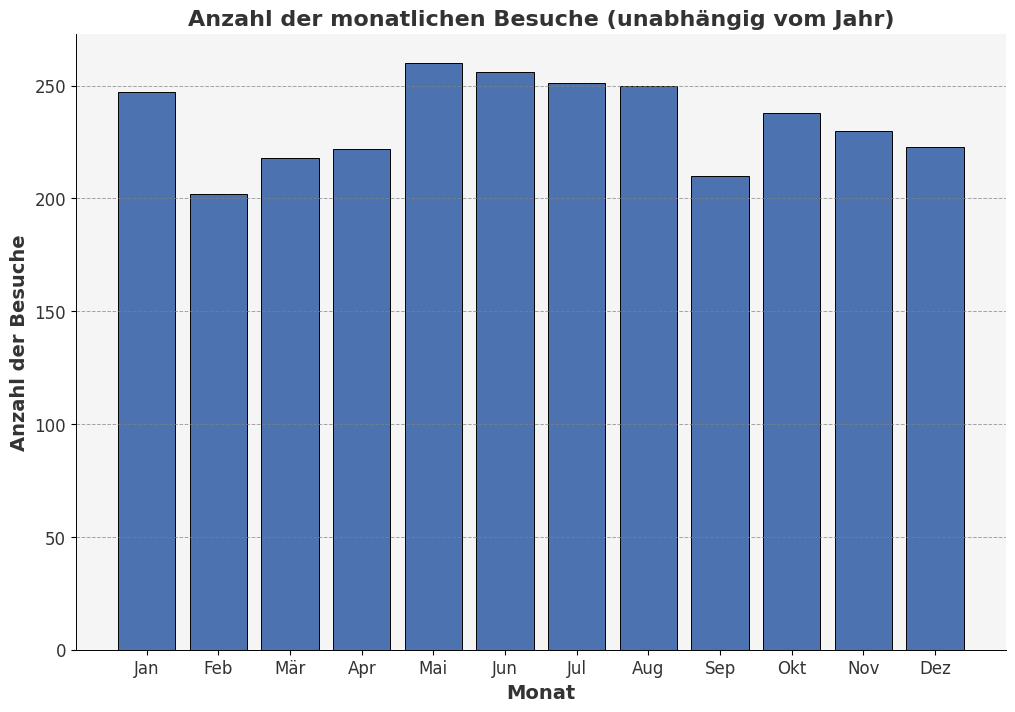

In [160]:
import matplotlib.pyplot as plt
import pandas as pd

# Hier konvertiere ich die Spalte VisitDate in das korrekte Datumsformat
hospital_visit['VisitDate'] = pd.to_datetime(hospital_visit['VisitDate'], errors='coerce', dayfirst=True)

# Ich ziehe den Monat aus dem Datum und füge ihn als neue Spalte hinzu
hospital_visit['Month'] = hospital_visit['VisitDate'].dt.month

# Hier werden die Besuche pro Monat gezählt und in einer neuen Tabelle gespeichert
monthly_visits = hospital_visit.groupby('Month').size().reset_index()
monthly_visits.columns = ['Month', 'Number_of_visits']

# Ausgabe der Tabelle
print(monthly_visits)

# Ich habe ich versucht ein Balkendiagramm zu erstellen, welches die Anzahl der Besuche für jeden Monat anzeigt. Dabei habe ich darauf geachtet, dass das Diagram
# übersichtlich und gut lesbar ist. Dafür habe ich die Farben, die Schriftgrößen und die Achsenbeschriftungen angepasst.
plt.figure(figsize=(12, 8))
plt.bar(monthly_visits['Month'], monthly_visits['Number_of_visits'], color='#4c72b0', edgecolor='k', linewidth=0.7)
plt.xlabel('Monat', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Anzahl der Besuche', fontsize=14, fontweight='bold', color='#333333')
plt.title('Anzahl der monatlichen Besuche (unabhängig vom Jahr)', fontsize=16, fontweight='bold', color='#333333')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().set_facecolor('#f5f5f5')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.7)
plt.gca().spines['bottom'].set_linewidth(0.7)

# Anzeige des Diagramms
plt.show()



So wurden die monatlichen Besuche der Patienten (unabhägig vom Jahr) in einem Balkendiagram visualisiert. Man hätte auch ein Linienchart verwenden können, um die Entwicklung der Besuche über die Zeit zu visualisieren.

Aufgabe 5: Als nächstes werden die Patienten in Altersgruppen eingeteilt.

In [161]:
# Hier werden die angeforderten Altersgruppen definiert und die Patienten entsprechend ihrer Altersgruppe zugeordnet.
age_bins = [40, 49, 59, 69, float('inf')]
age_labels = ['40-49', '50-59', '60-69', '70+']
patient_info['age_group'] = pd.cut(patient_info['Age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

print(patient_info)

      Participant_ID     Sex  Age Smoking_status      BMI  Disease  \
0            1003300    Male   62       Previous  33.7597        2   
1            1004025    Male   60       Previous  28.1173        1   
2            1005551    Male   69       Previous  26.4159        2   
3            1005594    Male   64       Previous  24.7550        1   
4            1005624    Male   64       Previous  35.0773        2   
...              ...     ...  ...            ...      ...      ...   
2205         6009769    Male   48       Previous  39.3345        2   
2206         6011693    Male   62       Previous  30.8813        2   
2207         6015403  Female   60       Previous  34.7276        1   
2208         6019982    Male   54          Never  25.3287        2   
2209         6020094  Female   63          Never  24.2972        2   

      Number_of_visits age_group  
0                    2     60-69  
1                    0     60-69  
2                    2     60-69  
3                  

Somit wurden alle relevanten Patienten in die angeforderten Altergruppen eingeordnet. 

Aufgabe 6: Letztlich werden die beiden Datensätze zusammengesetzt

In [162]:
# Hier werden die Daten aus den beiden Tabellen zusammengeführt, sodass die Informationen aus beiden Tabellen in einer Tabelle vorliegen.
merged_data = pd.merge(patient_info, hospital_visit[['Participant_ID']], left_on='Participant_ID', right_on='Participant_ID', how='left', validate='one_to_many')

# Hier wird nochmal sichergestellt, dass nur die gewünschten Spalten in der finalen Tabelle enthalten sind.
columns_to_include = ['Participant_ID', 'Sex', 'Age', 'BMI', 'Smoking_status', 'Number_of_visits', 'Disease', 'age_group']
merged_data = patient_info[columns_to_include]

# Hier wird noch die Datei ohne Indezes als csv gespeichert.
merged_data.to_csv('merged_data.csv', index=False)

print(merged_data)

      Participant_ID     Sex  Age      BMI Smoking_status  Number_of_visits  \
0            1003300    Male   62  33.7597       Previous                 2   
1            1004025    Male   60  28.1173       Previous                 0   
2            1005551    Male   69  26.4159       Previous                 2   
3            1005594    Male   64  24.7550       Previous                 1   
4            1005624    Male   64  35.0773       Previous                 1   
...              ...     ...  ...      ...            ...               ...   
2205         6009769    Male   48  39.3345       Previous                 0   
2206         6011693    Male   62  30.8813       Previous                 2   
2207         6015403  Female   60  34.7276       Previous                 0   
2208         6019982    Male   54  25.3287          Never                 0   
2209         6020094  Female   63  24.2972          Never                 2   

      Disease age_group  
0           2     60-69  

Nach diesem Schritt sind die beiden Datensätze hospital_info und patient_info zusammengeführt und können für weitere Analysen verwendet werden.

Statistische Aufgaben

Aufgabe1: Vergleichen Sie den BMI zwischen den gesunden und den kranken Gruppen unter Verwendung eines Boxplots oder Violinplots.

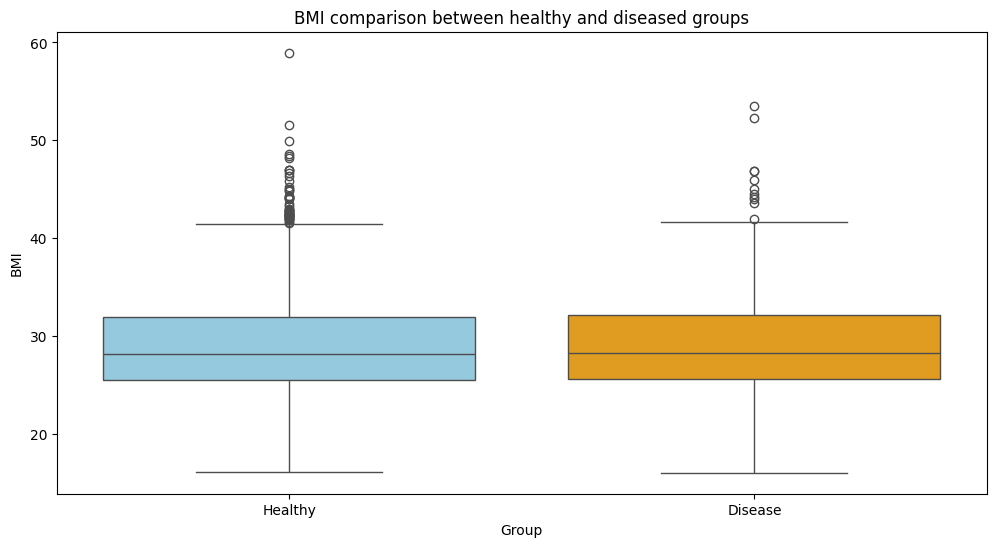

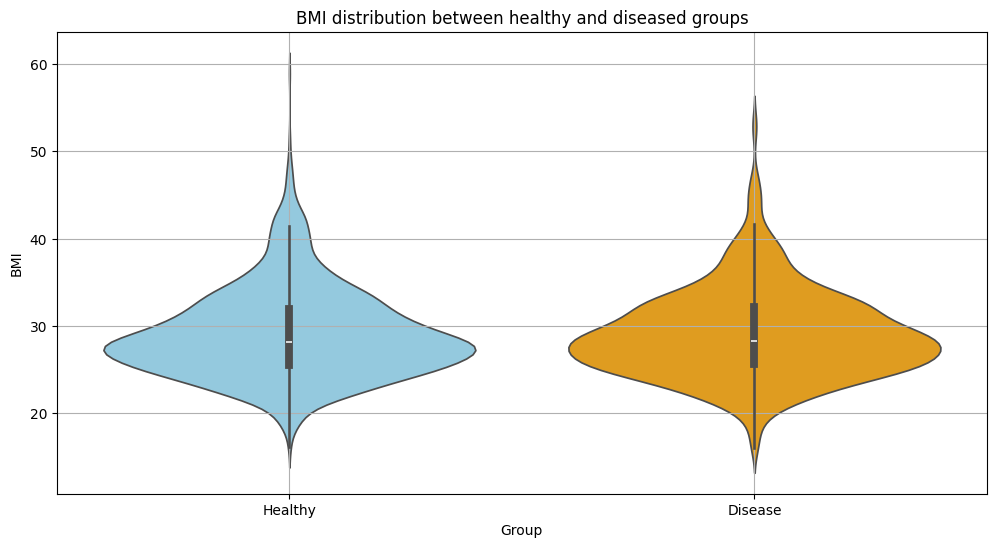

In [163]:
import seaborn as sns

file_path = 'merged_data.csv'
merged_data = pd.read_csv(file_path)

bmi_data = merged_data[['BMI', 'Disease']].copy()

# Hier wandel ich die numerischen Werte in der Disease-Spalte in lesbare Werte um.
bmi_data['Disease'] = bmi_data['Disease'].map({1: 'Disease', 2: 'Healthy'})

# Ich wird ein Boxplot erstellt, der den BMI zwischen gesunden und kranken Patienten vergleicht. Dabei wird darauf geachtet, dass die Farben und die Beschriftungen gut lesbar sind.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Disease', y='BMI', data=bmi_data, hue='Disease', legend=False, palette={'Healthy': 'skyblue', 'Disease': 'orange'})
plt.title('BMI comparison between healthy and diseased groups')
plt.xlabel('Group')
plt.ylabel('BMI')


# Hier wird ein Violinplot erstellt, der den BMI zwischen gesunden und kranken Patienten vergleicht. Dabei wird darauf geachtet, dass die Farben und die Beschriftungen gut lesbar sind.
plt.figure(figsize=(12, 6))
sns.violinplot(x='Disease', y='BMI', data=bmi_data, hue='Disease', legend=False, palette={'Healthy': 'skyblue', 'Disease': 'orange'})
plt.title('BMI distribution between healthy and diseased groups')
plt.xlabel('Group')
plt.ylabel('BMI')
plt.grid(True)



plt.show()

Boxplot

Der Boxplot zeigt, dass die BMI-Verteilungen für beide Gruppen ähnliche Mediane haben.
Die Quartile und Whiskers sind ebenfalls vergleichbar, was auf ähnliche Streuungen hinweist.
Es gibt einige Ausreißer in beiden Gruppen, die jedoch nicht extrem sind.

Rundum sind beide Gruppen aufgrund ihrer ähnlichen Verteilung des BMI gut vergleichbar.

Somit gibt es keine signifikaten Unterschiede in der Verteilung des BMI zwischen den beiden Gruppen.


Violinplot

Der Violinplot ergänzt die Information des Boxplots durch die Dichteverteilung.
Beide Gruppen zeigen eine ähnliche Dichteverteilung des BMI, wobei keine eindeutigen Unterschiede in der Form der Verteilungen erkennbar sind.
Eventuell ist beobachtbar, dass um den BMI-Wert von 40 herum mehr Patienten in der gesunden Gruppe liegen.

Die Dichteverteilungen sind relativ symmetrisch, was auf eine gleichmäßige Verteilung der BMI-Werte hinweist.


Fazit
Die vergleichbare Dichteverteilung in beiden Gruppen deutet darauf hin, dass der BMI in beiden Gruppen ähnlich verteilt ist. Es gibt keine signifikanten Unterschiede in der Form der Verteilung, was bedeutet, dass die Gruppen in Bezug auf den BMI homogen sind.

Die leichte Anhäufung um den BMI-Wert von 40 in der gesunden Gruppe könnte auf spezifische demografische oder gesundheitliche Merkmale hinweisen, die in dieser Gruppe häufiger vorkommen.

Die symmetrischen Verteilungen deuten darauf hin, dass die BMI-Werte in beiden Gruppen normal verteilt sind, ohne extreme Abweichungen. Dies unterstützt die Annahme, dass die BMI-Daten in beiden Gruppen stabil und repräsentativ sind.

Insgesamt gibt es anhand des Boxplots und des Violinplots keine Hinweise darauf, dass der BMI ein signifikanter Unterschied zwischen den gesunden und kranken Gruppen ist.

Aufgabe 2: Untersuchen Sie, ob sich der Anteil des Rauchstatus zwischen den gesunden und den Kontrollgruppen unterscheidet.

contingency_table=Smoking_status  Current  Never  Prefer not to answer  Previous
Disease                                                       
1                    92    214                     5       254
2                   258    635                     4       748
chi2=np.float64(4.431338646099254)
p=np.float64(0.21849710009616582)
dof=3
expected=array([[ 89.47963801, 217.0520362 ,   2.30090498, 256.16742081],
       [260.52036199, 631.9479638 ,   6.69909502, 745.83257919]])


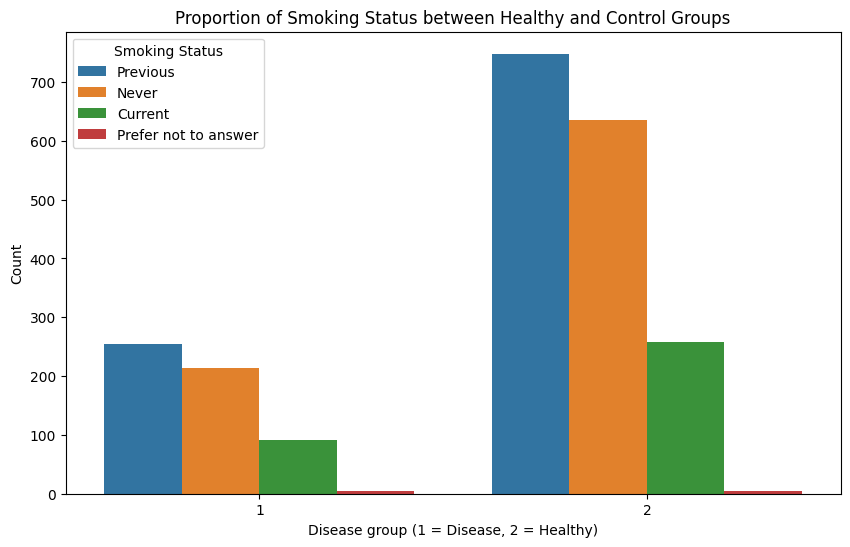

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

file_path = 'merged_data.csv'
merged_data = pd.read_csv(file_path)

# Es wird eine Chi-Quadrat-Test vorbereitet, um zu überprüfen, ob es einen signifikanten Zusammenhang zwischen Rauchverhalten und Krankheit gibt.
contingency_table = pd.crosstab(merged_data['Disease'], merged_data['Smoking_status'])

smoking_data = merged_data[['Disease', 'Smoking_status']].copy()

# Hier ist die eigentliche Berechnung des Chi-Quadrat-Tests
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Überprüfung der Ergebnisse
print(f'{contingency_table=}')
print(f'{chi2=}')
print(f'{p=}')
print(f'{dof=}')
print(f'{expected=}')

# Zur visuellen Nachvollziehbarkeit wird ein Balkendiagramm erstellt, das den Anteil der Rauchstatusgruppen in den gesunden und kranken Gruppen anzeigt.
plt.figure(figsize=(10, 6))
sns.countplot(x='Disease', hue='Smoking_status', data=smoking_data)
plt.title('Proportion of Smoking Status between Healthy and Control Groups')
plt.xlabel('Disease group (1 = Disease, 2 = Healthy)')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.show()

Der Chi-Quadrat-Test wird verwendet, um zu überprüfen, ob es einen signifikanten Unterschied in den Rauchgewohnheiten zwischen den gesunden und den Kontrollgruppen gibt. Dieser eignet sich für kategoriale Daten wie Rauchstatus und Erkrankungsstatus.

Interpretation:

Der p-Wert ist größer als 0.05 (p=0.21849710009616582), was bedeutet, dass es keinen statistisch signifikanten Unterschied in den Anteilen der Rauchgewohnheiten zwischen den gesunden und den Kontrollgruppen gibt.

Dies deutet darauf hin, dass die Rauchgewohnheiten in beiden Gruppen ähnlich verteilt sind.

Visualisierung:
Das Balkendiagramm zeigt die Anzahl der Teilnehmer in jeder Raucherkategorie für die beiden Gruppen. Die Verteilungen scheinen visuell von den Portotionen her ähnlich zu sein, was die Ergebnisse des Chi-Quadrat-Tests unterstützt.

Aufgabe 3: Analyze the relationship between smoking status and the number of hospital visits, separately for the disease and healthy groups, and for the overall population.

Number of outliers removed: 13


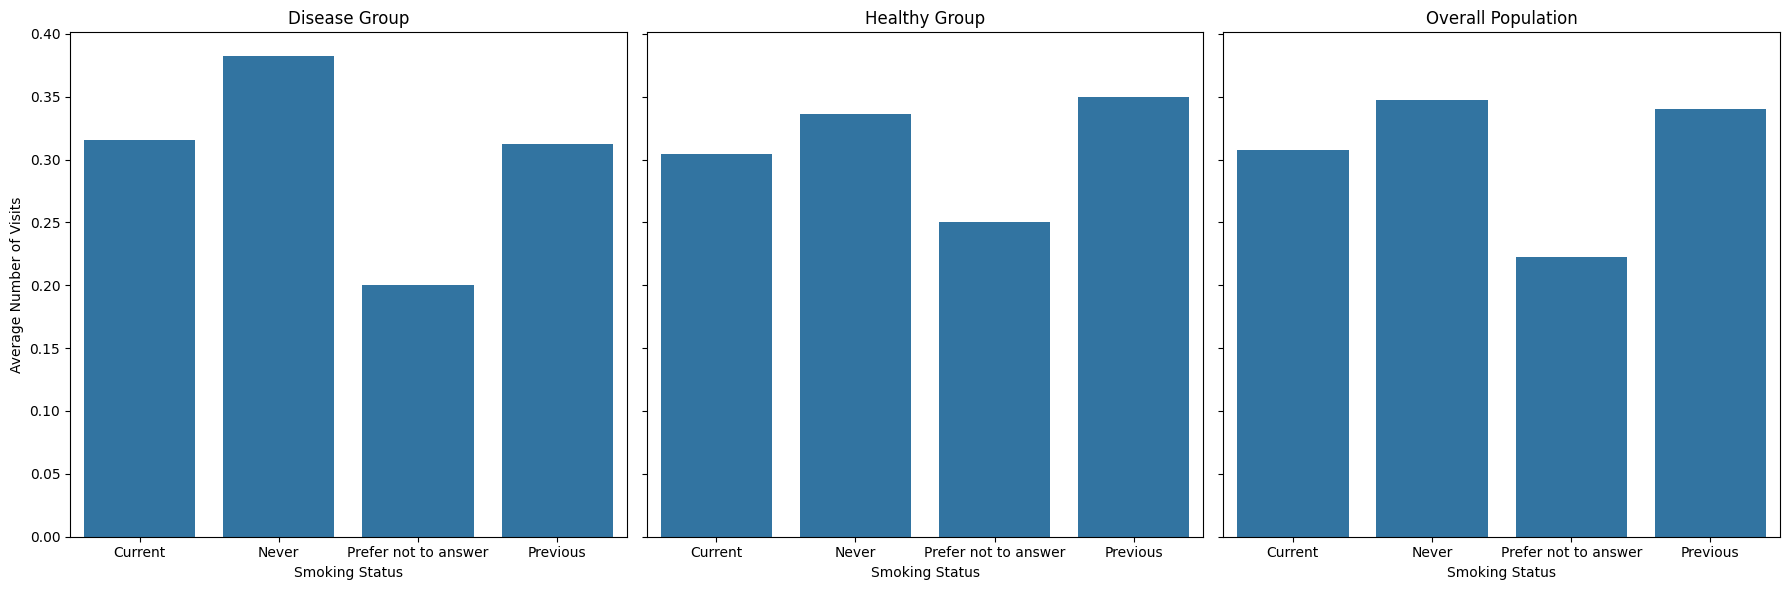

ANOVA Results for Disease Group: F_onewayResult(statistic=np.float64(1.0693669487966864), pvalue=np.float64(0.3439331114043067))
ANOVA Results for Healthy Group: F_onewayResult(statistic=np.float64(0.6638546467104534), pvalue=np.float64(0.5150022076043225))
ANOVA Results for Overall Population: F_onewayResult(statistic=np.float64(0.6997695210034764), pvalue=np.float64(0.4968110491280865))
                      Disease Group  Healthy Group  Overall Population
Smoking_status                                                        
Current                    0.315217       0.304688            0.307471
Never                      0.382075       0.335975            0.347568
Prefer not to answer       0.200000       0.250000            0.222222
Previous                   0.312253       0.349462            0.340020


In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

file_path = 'merged_data.csv'
merged_data = pd.read_csv(file_path)

# Ich versuche hier Außreißer nach der IQR-Methode zu entfernen, um die Daten zu bereinigen und somit aussagekräftigere Ergebnisse zu erhalten.
Q1 = merged_data['Number_of_visits'].quantile(0.25)
Q3 = merged_data['Number_of_visits'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hier werden letzendlich die Daten ohne Außreißer gespeichert.
data_no_outliers = merged_data[(merged_data['Number_of_visits'] >= lower_bound) & (merged_data['Number_of_visits'] <= upper_bound)].copy()

# Print zur Ausgabe der Anzahl der entfernten Außreißer
num_outliers = merged_data.shape[0] - data_no_outliers.shape[0]
print(f"Number of outliers removed: {num_outliers}")

# Anpassung der Disease-Spalte, sodass 1 für Krank und 2 für Gesund steht.
data_no_outliers['Disease'] = data_no_outliers['Disease'].astype(object)

# Hier wird die Disease-Spalte in lesbare Werte umgewandelt.
data_no_outliers['Disease'] = data_no_outliers['Disease'].map({1: 'Disease', 2: 'Healthy'}).copy()


# Hier trenne ich die Daten in zwei Gruppen auf, um die durchschnittliche Anzahl der Krankenhausbesuche für jede Rauchstatusgruppe innerhalb jeder Gruppe zu berechnen.
disease_group = data_no_outliers[data_no_outliers['Disease'] == 'Disease']
healthy_group = data_no_outliers[data_no_outliers['Disease'] == 'Healthy']

# Hier versuche ich die Durschnittswerte für die Anzahl der Besuche für jede Rauchstatusgruppe in den beiden Gruppen zu berechnen.
disease_visits_by_smoking = disease_group.groupby('Smoking_status')['Number_of_visits'].mean()
healthy_visits_by_smoking = healthy_group.groupby('Smoking_status')['Number_of_visits'].mean()
overall_visits_by_smoking = data_no_outliers.groupby('Smoking_status')['Number_of_visits'].mean()

# Visualisierung der Ergebnisse in einem Balkendiagramm
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(x=disease_visits_by_smoking.index, y=disease_visits_by_smoking.values, ax=ax[0])
ax[0].set_title('Disease Group')
ax[0].set_xlabel('Smoking Status')
ax[0].set_ylabel('Average Number of Visits')

sns.barplot(x=healthy_visits_by_smoking.index, y=healthy_visits_by_smoking.values, ax=ax[1])
ax[1].set_title('Healthy Group')
ax[1].set_xlabel('Smoking Status')
ax[1].set_ylabel('')

sns.barplot(x=overall_visits_by_smoking.index, y=overall_visits_by_smoking.values, ax=ax[2])
ax[2].set_title('Overall Population')
ax[2].set_xlabel('Smoking Status')
ax[2].set_ylabel('')

plt.tight_layout()
plt.show()

# Ergebnisse zum Vergleich der durchschnittlichen Anzahl der Besuche für jede Rauchstatusgruppe in den beiden Gruppen und der Gesamtbevölkerung
results_df = pd.DataFrame({
    'Disease Group': disease_visits_by_smoking,
    'Healthy Group': healthy_visits_by_smoking,
    'Overall Population': overall_visits_by_smoking
})

# Statistische ANOVA-Tests, um zu überprüfen, ob es signifikante Unterschiede in der durchschnittlichen Anzahl der Besuche zwischen den Rauchstatusgruppen gibt.
anova_disease = f_oneway(
    disease_group[disease_group['Smoking_status'] == 'Current']['Number_of_visits'],
    disease_group[disease_group['Smoking_status'] == 'Never']['Number_of_visits'],
    disease_group[disease_group['Smoking_status'] == 'Previous']['Number_of_visits']
)

anova_healthy = f_oneway(
    healthy_group[healthy_group['Smoking_status'] == 'Current']['Number_of_visits'],
    healthy_group[healthy_group['Smoking_status'] == 'Never']['Number_of_visits'],
    healthy_group[healthy_group['Smoking_status'] == 'Previous']['Number_of_visits']
)

anova_overall = f_oneway(
    data_no_outliers[data_no_outliers['Smoking_status'] == 'Current']['Number_of_visits'],
    data_no_outliers[data_no_outliers['Smoking_status'] == 'Never']['Number_of_visits'],
    data_no_outliers[data_no_outliers['Smoking_status'] == 'Previous']['Number_of_visits']
)

print("ANOVA Results for Disease Group:", anova_disease)
print("ANOVA Results for Healthy Group:", anova_healthy)
print("ANOVA Results for Overall Population:", anova_overall)

print(results_df)


Das Balkendiagramm zeigt die durchschnittliche Anzahl der Krankenhausbesuche für jede Raucherkategorie in den gesunden und kranken Gruppen sowie für die Gesamtpopulation.
In allen betrachteten Gruppen scheint der durchschnittliche Krankenhausbesuch für alle Raucherkategorien ähnlich zu sein.

Die ANOVA-Analyse bestätigt diese Beobachtung, da alle p-Werte größer als 0.05 sind, was darauf hindeutet, dass es keinen signifikanten Unterschied in der Anzahl der Krankenhausbesuche zwischen den Raucherkategorien gibt.

Aufgabe 4 : Determine if the number of visits is higher in the disease group compared to the healthy group.

In [166]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import mannwhitneyu, shapiro

file_path = 'merged_data.csv'
merged_data = pd.read_csv(file_path)

# Identifikation von Ausreißern mit der IQR-Methode
Q1 = merged_data['Number_of_visits'].quantile(0.25)
Q3 = merged_data['Number_of_visits'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Entfernen der Ausreißer
data_no_outliers = merged_data[(merged_data['Number_of_visits'] >= lower_bound) & (merged_data['Number_of_visits'] <= upper_bound)].copy()

# Aufteilung der Daten in zwei Gruppen
disease_group = data_no_outliers[data_no_outliers['Disease'] == 1]['Number_of_visits']
healthy_group = data_no_outliers[data_no_outliers['Disease'] == 2]['Number_of_visits']

# Berechnung der durchschnittlichen Anzahl der Besuche für jede Gruppe
avg_visits_disease = disease_group.mean()
avg_visits_healthy = healthy_group.mean()
std_visits_disease = disease_group.std()
std_visits_healthy = healthy_group.std()

# Durchführung des Shapiro-Wilk-Tests auf Normalverteilung
shapiro_disease = shapiro(disease_group)
shapiro_healthy = shapiro(healthy_group)

# Auswahl des Tests basierend auf der Normalverteilung
if shapiro_disease.pvalue > 0.05 and shapiro_healthy.pvalue > 0.05:
    # Wenn beide Gruppen normalverteilt sind, T-Test durchführen
    t_stat, p_value_ttest = stats.ttest_ind(disease_group, healthy_group, equal_var=False)
    test_stat = t_stat
    p_value = p_value_ttest
    test_name = 'T-Test'
else:
    # Wenn eine oder beide Gruppen nicht normalverteilt sind, Mann-Whitney-U-Test durchführen, da dieser nicht-parametrisch ist.
    u_stat, p_value_mannwhitney = mannwhitneyu(disease_group, healthy_group)
    test_stat = u_stat
    p_value = p_value_mannwhitney
    test_name = 'Mann-Whitney-U-Test'

# Ergebnisse anzeigen
results = {
    'Avg Visits Disease': avg_visits_disease,
    'Std Visits Disease': std_visits_disease,
    'Avg Visits Healthy': avg_visits_healthy,
    'Std Visits Healthy': std_visits_healthy,
    'Shapiro Disease p-value': shapiro_disease.pvalue,
    'Shapiro Healthy p-value': shapiro_healthy.pvalue,
    'Test Name': test_name,
    'Test Statistic': test_stat,
    'Test p-value': p_value
}

results


{'Avg Visits Disease': np.float64(0.33807829181494664),
 'Std Visits Disease': np.float64(0.5402929233826097),
 'Avg Visits Healthy': np.float64(0.3370030581039755),
 'Std Visits Healthy': np.float64(0.5370663061940343),
 'Shapiro Disease p-value': np.float64(2.3287705286608974e-33),
 'Shapiro Healthy p-value': np.float64(5.914270608455456e-51),
 'Test Name': 'Mann-Whitney-U-Test',
 'Test Statistic': np.float64(459489.0),
 'Test p-value': np.float64(0.9958982086123199)}

Der Shapiro-Wilk-Test zeigt, dass die Daten nicht normalverteilt sind, daher wird der Mann-Whitney-U-Test verwendet, um den Unterschied in der Anzahl der Besuche zwischen den kranken und gesunden Gruppen zu überprüfen.

Aufgrund der ermittelten p-Werte im Mann-Whitney-U-Test sind keine signifikanten Unterschiede in der Anzahl der Besuche zwischen den kranken und gesunden Gruppen feststellbar.

Aufgabe 5: Calculate the disease prevalence (number of sick  / total number population) across different age groups  in our dataset, and test if the prevalence is different across the group


In [167]:
import pandas as pd
from scipy import stats

file_path = 'merged_data.csv'
merged_data = pd.read_csv(file_path)

# Identifikation von Ausreißern mit der IQR-Methode
Q1 = merged_data['Number_of_visits'].quantile(0.25)
Q3 = merged_data['Number_of_visits'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Entfernen der Ausreißer
data_no_outliers = merged_data[(merged_data['Number_of_visits'] >= lower_bound) & (merged_data['Number_of_visits'] <= upper_bound)].copy()

# Ändern der Disease-Spalte in lesbare Werte
data_no_outliers['Disease'] = data_no_outliers['Disease'].replace({1: 'Disease', 2: 'Healthy'}).astype(str)

# Berechnung der Krankheitsprävalenz in den verschiedenen Altersgruppen
disease_prevalence = data_no_outliers.groupby('age_group')['Disease'].apply(lambda x: (x == 'Disease').mean())

# Chi-Quadrat-Test zur Überprüfung, ob die Prävalenz zwischen den Gruppen unterschiedlich ist
contingency_table = pd.crosstab(data_no_outliers['age_group'], data_no_outliers['Disease'])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

print("contingency table:\n", contingency_table)
print("chi2-test results", chi2_stat, "p-Wert:", p_val)




contingency table:
 Disease    Disease  Healthy
age_group                  
40-49           42      113
50-59          108      386
60-69          404     1110
70+              8       26
chi2-test results 4.818733080966535 p-Wert: 0.18556187947626182


Die Krankheitsprävalenz variiert zwischen den verschiedenen Altersgruppen, wobei die höchste Prävalenz in der Altersgruppe 60-69 und die niedrigste in der Altersgruppe 70+ liegt. 
Jedoch zeigen die Ergebnisse des Chi-Quadrat-Tests, dass die Unterschiede in der Prävalenz zwischen diesen Altersgruppen nicht statistisch signifikant sind.
Dies deutet darauf hin, dass die beobachteten Unterschiede in der Krankheitsprävalenz zwischen den Altersgruppen zufällig sein könnten.

Zusammengefasst sind die leichten Unterschiede der Prävalenz statistisch nicht signifikant und somit ähnlich verteilt.